<a href="https://colab.research.google.com/github/sarthak-thakare/WIDS-2024/blob/main/Copy_of_AI_phabet_EMNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

### It is recommended to upload the zipped EMNIST dataset to your Google Drive.

### Then, mount Google Drive and import the dataset (by executing the following code).

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Unzipping .zip dataset file from drive to /content folder of your colab notebook

import shutil
import zipfile

zip_file_path = '/content/drive/MyDrive/A_Z Handwritten Data.zip' # Change as per your dataset file path in drive
extracted_dir = '/content'

import os
os.makedirs(extracted_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [6]:
data = pd.read_csv('A_Z Handwritten Data.csv')

# Display this dataset
# It's first column contains all the labels (o to 25 for A to Z) and the remaining 784 columns contain pixel values.
# Seperate them accordingly as X (for pixel values) and Y (for labels)
# Convert these to numpy arrays
# Normalize the X array (X/255), normalizing by 255 scales pixel values to a range between 0 and 1, promoting numerical stability, consistent scale across features, and optimizing the sensitivity of activation functions during neural network training.
# As you can see, this dataset is sorted from A to Z, it needs to be shuffled before it can be used for training
# Shuffle the dataset
# Create training and validation sets


print(data.head())


X = data.drop('0', axis=1).values
Y = data['0'].values


X = X / 255.0

# Shuffle the dataset by randomly reordering the data
indices = np.random.permutation(X.shape[0])
X_shuffled = X[indices]
Y_shuffled = Y[indices]

train_size = int(0.8 * X_shuffled.shape[0])
X_train, X_val = X_shuffled[20:train_size], X_shuffled[train_size:]
Y_train, Y_val = Y_shuffled[20:train_size], Y_shuffled[train_size:]
X_test,Y_test=X_shuffled[:20],Y_shuffled[:20]

# Optionally, you can print out the shape of the datasets to check
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Training set shape: (297940, 784)
Validation set shape: (74490, 784)


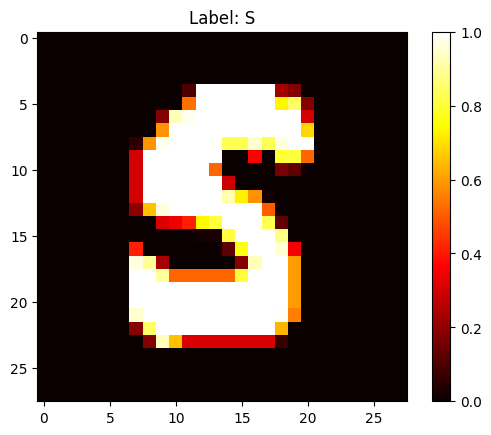

In [7]:
# Display a single training set sample along with its label using matplot heatmap

import matplotlib.pyplot as plt
import numpy as np


sample_index = 0
sample_image = X_train[sample_index].reshape(28, 28)

label = Y_train[sample_index]
label_char = chr(label + 65)

# Display the image using a heatmap
plt.imshow(sample_image, cmap='hot', interpolation='nearest')
plt.title(f'Label: {label_char}')
plt.colorbar()
plt.show()


# Model

In [8]:
# You can copy-paste your MNIST model and make necessary changes to train the model on EMNIST
# Changes would include : Shapes of weight matrices, no. of output nodes and return vector of one_hot function
# Note that you might need to increase number of nodes in the hidden layers too to accomodate for the additional output information compared to MNIST
# Experiment with these numbers and find the optimal number of nodes for each layer

import numpy as np
import matplotlib.pyplot as plt

# We'll be making a model with 2 hidden layers with sigmoid activations

i = 784  # Input size (no. of pixels = 28*28 = 784)
h1 = 64
h2 = 64
o = 26  # Output size (26 characters A-Z)
lr = 0.01  # Learning rate
epochs = 10  # Number of epochs

# Initialize the weights and biases
W1 = np.random.randn(i, h1) * 0.01
W2 = np.random.randn(h1, h2) * 0.01
W3 = np.random.randn(h2, o) * 0.01

# Initialize b1 b2 b3
b1 = np.zeros((1, h1))
b2 = np.zeros((1, h2))
b3 = np.zeros((1, o))

# Defining Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoidprime(z):
    return np.exp(-z) * (1 / ((1 + np.exp(-z)) ** 2))

# One-hot encoding function
def one_hot(y):
    vec = np.zeros(o)
    vec[y] = 1
    return vec

# Training Loop
cost_list = []
count = 0

for ep in range(epochs):
    for i in range(len(X_train)):
        # Forward Propagation
        z1 = np.dot(X_train[i].reshape(1, -1), W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, W3) + b3
        y_predicted = sigmoid(z3)

        # Convert the label to one-hot encoded vector
        hot_correct_vector = one_hot(Y_train[i])

        # Calculate the loss
        loss = np.sum((hot_correct_vector - y_predicted) ** 2)

        count += 1
        if count % 200 == 0:
            cost_list.append(loss)

        # Backpropagation
        dz3 = y_predicted - hot_correct_vector
        dw3 = np.dot(a2.T, dz3)
        db3 = dz3

        da2 = np.dot(dz3, W3.T)
        dz2 = da2 * sigmoidprime(z2)
        dw2 = np.dot(a1.T, dz2)
        db2 = dz2

        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * sigmoidprime(z1)
        dw1 = np.dot(X_train[i].reshape(1, -1).T, dz1)
        db1 = dz1

        # Update the weights and biases
        W3 -= lr * dw3
        W2 -= lr * dw2
        W1 -= lr * dw1
        b3 -= lr * db3
        b2 -= lr * db2
        b1 -= lr * db1

    # Forward propagation for the validation set
    correct_predictions = 0
    new_cost_list = []
    for j in range(len(X_val)):
        z1_val = np.dot(X_val[j].reshape(1, -1), W1) + b1
        a1_val = sigmoid(z1_val)
        z2_val = np.dot(a1_val, W2) + b2
        a2_val = sigmoid(z2_val)
        z3_val = np.dot(a2_val, W3) + b3
        y_predicted_val = sigmoid(z3_val)

        new_loss = np.sum((one_hot(Y_val[j]) - y_predicted_val) ** 2)
        new_cost_list.append(new_loss)
        if np.argmax(y_predicted_val) == Y_val[j]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X_val)
    print(f"Epoch {ep+1}/{epochs}, Loss: {np.mean(new_cost_list):.4f}, Accuracy: {accuracy:.2f}")

# Test accuracy
correct_predictions = 0
for i in range(len(X_test)):
    z1_test = np.dot(X_test[i].reshape(1, -1), W1) + b1
    a1_test = sigmoid(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    a2_test = sigmoid(z2_test)
    z3_test = np.dot(a2_test, W3) + b3
    y_predicted_test = sigmoid(z3_test)

    if np.argmax(y_predicted_test) == Y_test[i]:
        correct_predictions += 1

test_accuracy = correct_predictions / len(X_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10, Loss: 0.1374, Accuracy: 0.92
Epoch 2/10, Loss: 0.0919, Accuracy: 0.94
Epoch 3/10, Loss: 0.0768, Accuracy: 0.95
Epoch 4/10, Loss: 0.0691, Accuracy: 0.96
Epoch 5/10, Loss: 0.0644, Accuracy: 0.96
Epoch 6/10, Loss: 0.0617, Accuracy: 0.96
Epoch 7/10, Loss: 0.0593, Accuracy: 0.96
Epoch 8/10, Loss: 0.0576, Accuracy: 0.97
Epoch 9/10, Loss: 0.0562, Accuracy: 0.97
Epoch 10/10, Loss: 0.0551, Accuracy: 0.97
Test Accuracy: 0.95


# Testing the model

In [9]:

def classify(image):

    z1 = np.dot(image.reshape(1, -1), W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    y_predicted = sigmoid(z3)


    return np.argmax(y_predicted)



(784,)


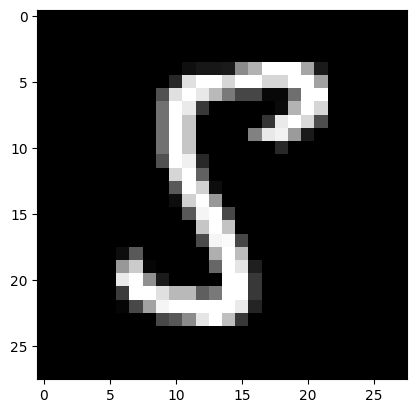

Actual Class:  S      Predicted Class: S


In [17]:


import matplotlib.pyplot as plt

index=np.random.randint(0,20)
image = X_test[index]
actual_image=Y_test[index]

print(image.shape)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()

# Use the classify function to predict the label for this image
predicted_class = classify(image)

# Display the model's predicted output
print(f"Actual Class:  {chr(65+actual_image)}      Predicted Class: {chr(65+predicted_class)}")



In [18]:
# Use np.save function to export the numpy arrays (Weights and bias matrices) after training and achieving a good accuracy

np.save('W1.npy', W1)
np.save('W2.npy', W2)
np.save('W3.npy', W3)
np.save('b1.npy', b1)
np.save('b2.npy', b2)
np.save('b3.npy', b3)


print("Weights and biases saved successfully!")

Weights and biases saved successfully!
